In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)*100
print("Accuracy:", accuracy)


Accuracy: 88.75


In [7]:
Y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[52  6]
 [ 3 19]]


C:\Users\jawad\AppData\Local\Temp\ipykernel_16084\825035892.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


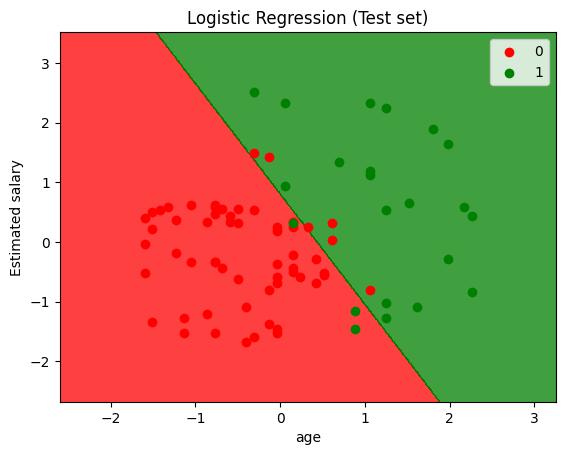

In [9]:
from matplotlib.colors import ListedColormap

X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the data points
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()



The logistic regression model achieved an accuracy of 88.75% on the test set. It correctly predicted 52 non-purchases, 19 purchases, 6 incorrect non-purchases, and 3 incorrect purchases. In comparison, the K-NN algorithm from Lab #3 achieved a higher accuracy of 93.75% and had a confusion matrix with 54 true negatives, 21 true positives, 4 false positives, and 1 false negative. The K-NN model outperformed the logistic regression model in terms of accuracy and had fewer false predictions.